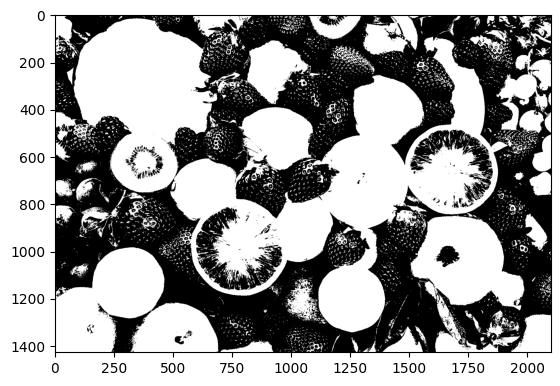

In [1]:
#Otsu

from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu
data = Image.open('fruit.jpg').convert('L')
a = np.asarray(data)
# performing Otsu's thresholding
thres = threshold_otsu (a)
# pixels with intensity greater than theshold are kept
b = a > thres
b = Image.fromarray (b)
plt.imshow(b)
plt.show()


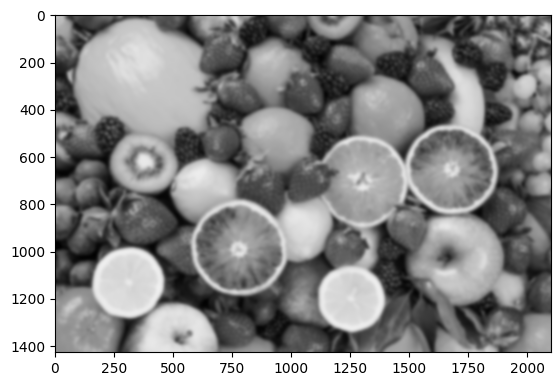

In [2]:
#Adaptive Thresholding

from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
data = Image.open('fruit.jpg').convert('L')
a = np.asarray (data)
# performing local thresholding
b = threshold_local (a, 39, offset=10)
b = Image.fromarray(b)
plt.imshow (b)
plt.show ()


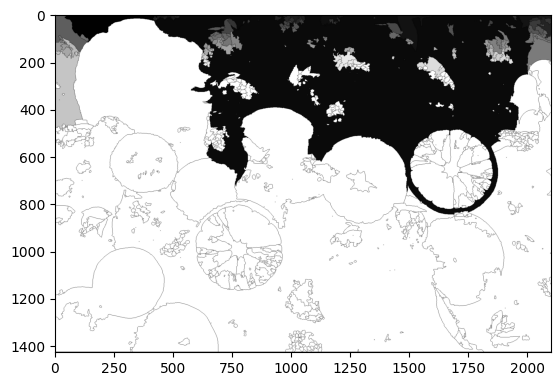

In [5]:
#region 

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# opening the image and converting it to grayscale
data = cv2.imread('fruit.jpg')
# covnerting image from color to grayscale
a = cv2.cvtColor (data, cv2.COLOR_BGR2GRAY)
#thresholding the image to obtain cell pixels
thresh, bl = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# since Otsu's method has over segmented the image
# erosion operation is performed
b2 = cv2.erode (bl, None, iterations = 2)
# distance transform is performed
dist_trans = cv2.distanceTransform (b2, 2, 3)
# thresholding the distance transform image to obtain
# pixels that are foreground
thresh, dt = cv2.threshold (dist_trans, 1, 255, cv2.THRESH_BINARY)
# performing labeling
labelled, ncc = label (dt)
# labelled is converted to 32-bit integer
labelled = labelled.astype (np.int32)
# performing watershed
cv2.watershed(data, labelled)
b = Image.fromarray (labelled)
plt.imshow (b)
plt.show ()


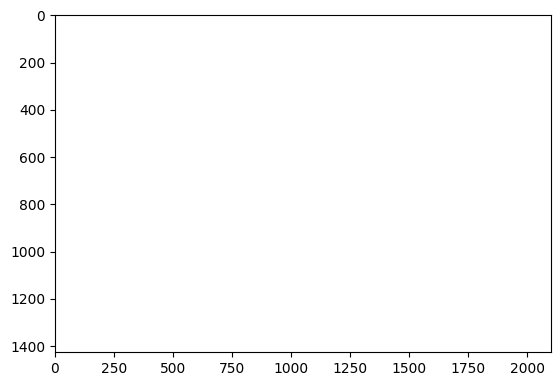

In [8]:
#binary_dilation

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# opening the image and converting it to grayscale
data = Image.open('fruit.jpg').convert('L')
b = nd.binary_dilation(data, iterations=50)
c= Image.fromarray(b)
c.show()
plt.imshow (c)
plt.show ()


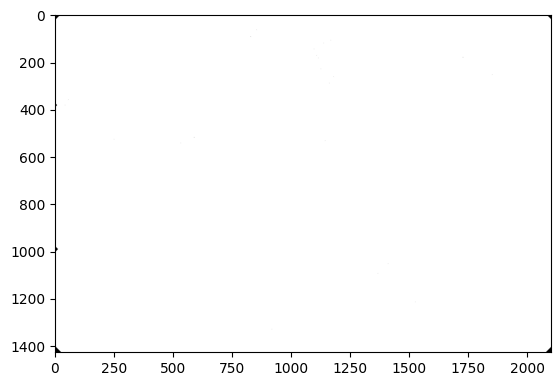

In [13]:
#binary_opening

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# opening the image and converting it to grayscale
data = Image.open('fruit.jpg').convert('L')
# defining the structuring element
s= [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening (data, structure=s, iterations=25)
c = Image.fromarray(b)
c.show ()
plt.imshow(c)
plt.show ()


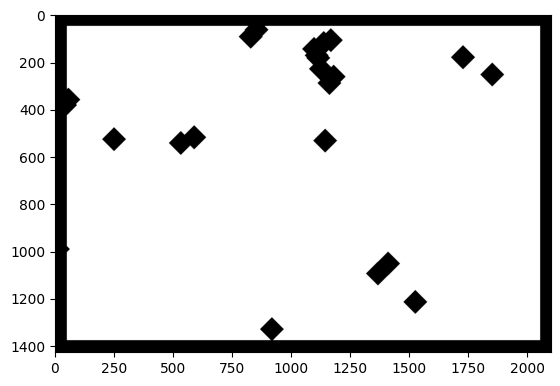

In [14]:
# binary_erosion

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

#opening the image and converting it to grayscale
data = Image.open('fruit.jpg').convert('L')
#defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iterations=50)
c = Image.fromarray (b)

c.show ()
plt.imshow (c)
plt.show ()

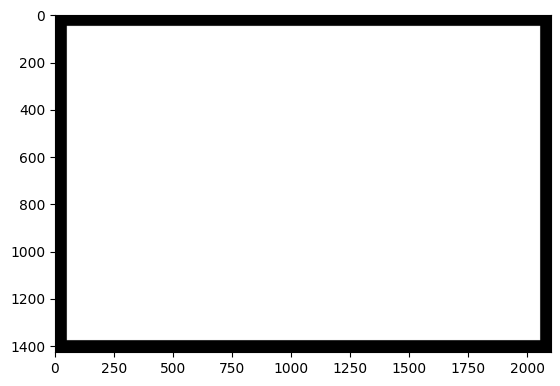

In [15]:
#binary_closing

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as np
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# opening the image and converting it to grayscale
data = Image.open('fruit.jpg').convert('L')
# defining the structuring element
s= [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b= nd.binary_closing (data, structure=s, iterations=50)
c= Image.fromarray (b)
c.show ()
plt.imshow(c)
plt.show ()

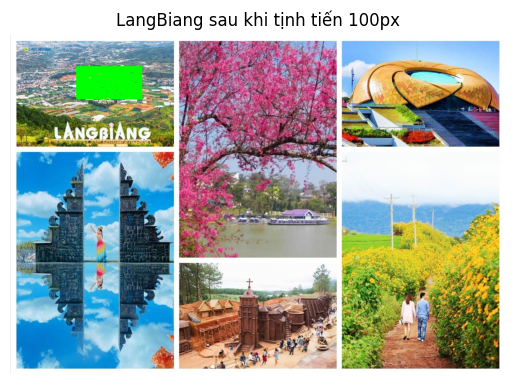

In [ ]:
#bt1
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Đọc ảnh từ thư mục exercise
image_path = "exercise/dalat.jpg" 
image = cv2.imread(image_path)

if image is None:
    print("Không tìm thấy ảnh. Kiểm tra lại đường dẫn.")
    exit()

# Chuyển ảnh sang thang xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng Otsu để tìm ngưỡng tự động
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Nếu muốn áp ngưỡng cụ thể 0.3 (theo yêu cầu đề bài)
threshold_value = int(0.3 * 255)
_, binary = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

# Tìm vùng LangBiang thủ công (ví dụ: chọn ROI tại một vùng có sẵn)
# Bạn có thể chỉnh tọa độ vùng chọn tùy vào ảnh thực tế
x, y, w, h = 100, 100, 200, 100  # (x, y, width, height)
roi = binary[y:y+h, x:x+w]

# Tịnh tiến sang phải 100px
translated = np.zeros_like(binary)
translated[y:y+h, x+100:x+100+w] = roi

# Áp vùng tịnh tiến vào ảnh gốc để trực quan hơn
result = image.copy()
result[translated == 255] = [0, 255, 0]  # Tô màu vùng LangBiang tịnh tiến bằng màu xanh lá

# Lưu ảnh
cv2.imwrite("lang_biang.jpg", result)

# Hiển thị kết quả
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("LangBiang sau khi tịnh tiến 100px")
plt.axis("off")
plt.show()

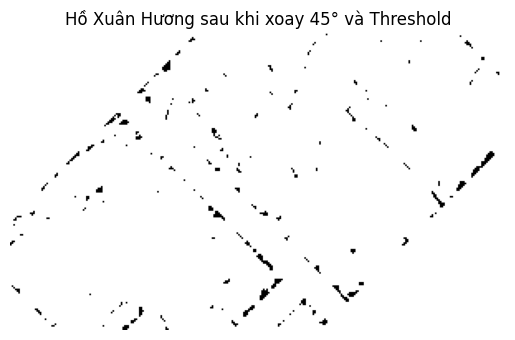

In [ ]:
#bt2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ thư mục exercise
image_path = "exercise/dalat.jpg"  
image = cv2.imread(image_path)

if image is None:
    print("Không tìm thấy ảnh.")
    exit()

# Chuyển sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Chọn vùng ảnh Hồ Xuân Hương (ví dụ: bạn cần xác định tọa độ này cho đúng)
x, y, w, h = 375, 200, 300, 180  # Điều chỉnh lại nếu cần
roi = gray[y:y+h, x:x+w]

# Xoay 45 độ quanh tâm vùng chọn
(h_roi, w_roi) = roi.shape
center = (w_roi // 2, h_roi // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_roi = cv2.warpAffine(roi, rotation_matrix, (w_roi, h_roi), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=255)

# Áp dụng Adaptive Thresholding
thresholded = cv2.adaptiveThreshold(rotated_roi, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=60)

# Lưu kết quả
cv2.imwrite("ho_xuan_huong.jpg", thresholded)

# Hiển thị ảnh
plt.imshow(thresholded, cmap='gray')
plt.title("Hồ Xuân Hương sau khi xoay 45° và Threshold")
plt.axis("off")
plt.show()


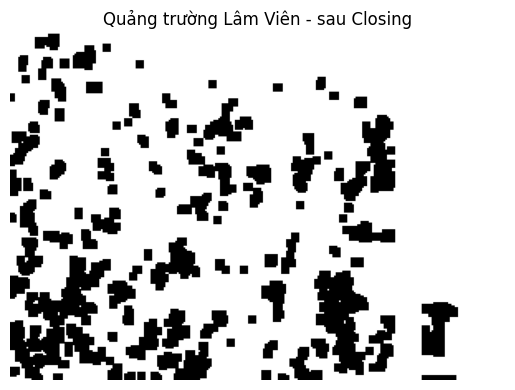

In [ ]:
#bt3
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
image = cv2.imread("exercise/dalat.jpg") 

if image is None:
    print("Không tìm thấy ảnh.")
    exit()

# Chuyển sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Cắt vùng Quảng Trường Lâm Viên
x, y, w, h = 755, 30, 300, 210
roi = gray[y:y+h, x:x+w]

# Ánh xạ tọa độ (Coordinate Mapping: ví dụ đơn giản là làm giãn kích thước vùng)
mapped = cv2.resize(roi, (w, h), interpolation=cv2.INTER_LINEAR)

# Nhị phân ảnh
_, binary = cv2.threshold(mapped, 127, 255, cv2.THRESH_BINARY)

# Áp dụng Binary Closing (dilate → erode)
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Lưu ảnh kết quả
cv2.imwrite("quan_truong_lam_vien.jpg", closed)

# Hiển thị
plt.imshow(closed, cmap='gray')
plt.title("Quảng trường Lâm Viên - sau Closing")
plt.axis("off")
plt.show()

In [ ]:
#bt4

import cv2
import numpy as np

def coordinate_mapping(image):
    return cv2.resize(image, (image.shape[1], image.shape[0])) 

def rotate(image, angle=45):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h))

def scale(image, fx=1.5, fy=1.5):
    return cv2.resize(image, None, fx=fx, fy=fy)

def shift(image, dx=100, dy=0):
    matrix = np.float32([[1, 0, dx], [0, 1, dy]])
    return cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))

def adaptive_thresholding(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

def binary_dilation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5), np.uint8)
    return cv2.dilate(binary, kernel)

def binary_erosion(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5), np.uint8)
    return cv2.erode(binary, kernel)

def otsu(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, result = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return result

# Map chức năng
geo_funcs = {
    "coordinate_mapping": coordinate_mapping,
    "rotate": rotate,
    "scale": scale,
    "shift": shift
}

seg_funcs = {
    "adaptive_thresholding": adaptive_thresholding,
    "binary_dilation": binary_dilation,
    "binary_erosion": binary_erosion,
    "otsu": otsu
}

# Menu
print("Chọn 1 hoặc 2 chức năng:")
print("Geometric transformation:", list(geo_funcs.keys()))
print("Segmentation:", list(seg_funcs.keys()))

# Input
geo_choice = input("Chọn 1 chức năng geometric_transformation (Enter để bỏ qua): ")
seg_choice = input("Chọn 1 chức năng segment (Enter để bỏ qua): ")

# Đọc ảnh
image = cv2.imread("exercise/dalat.jpg")
if image is None:
    print("Không tìm thấy ảnh.")
    exit()

result = image.copy()

# Áp dụng transformation nếu có
if geo_choice in geo_funcs:
    result = geo_funcs[geo_choice](result)

# Áp dụng segmentation nếu có
if seg_choice in seg_funcs:
    result = seg_funcs[seg_choice](result)

# Hiển thị kết quả
cv2.imshow("Kết quả", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


Chọn 1 hoặc 2 chức năng:
Geometric transformation: ['coordinate_mapping', 'rotate', 'scale', 'shift']
Segmentation: ['adaptive_thresholding', 'binary_dilation', 'binary_erosion', 'otsu']
